<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/MNIST/MNIST_dataset(with_epoch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.4.0

In [2]:
#epoch와 batch를 이용
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
 
tf.set_random_seed(777)  # for reproducibility
 
'''
from tensorflow.examples.tutorials.mnist import input_data
 
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
'''
#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]

test_x=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/test.csv',delimiter=',',dtype=np.float32)


print(y_data)
print(len(y_data))
print(y_data.reshape(len(y_data),1))

'''
filename_queue = tf.train.string_input_producer(
    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')
 
reader=tf.TextLineReader()
key, value = reader.read(filename_queue)
 
record_defaults=[[0.]]*785
xy=tf.decode_csv(value, record_defaults=record_defaults)
 
train_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))
test_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))
'''

print('Data loaded!!')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

[1. 0. 1. ... 7. 6. 9.]
42000
[[1.]
 [0.]
 [1.]
 ...
 [7.]
 [6.]
 [9.]]
Data loaded!!


Epoch: 0001, Cost: 4167.210449219
Epoch: 0101, Cost: 1.893280029
Epoch: 0201, Cost: 0.717573099
Epoch: 0301, Cost: 0.403222677
Epoch: 0401, Cost: 0.266571958
Epoch: 0501, Cost: 0.192598522
Epoch: 0601, Cost: 0.147027547
Epoch: 0701, Cost: 0.116493345
Epoch: 0801, Cost: 0.095104946
Epoch: 0901, Cost: 0.079308369
Learning finished
Accuracy:  0.88330954
27465 Prediction:  [7]


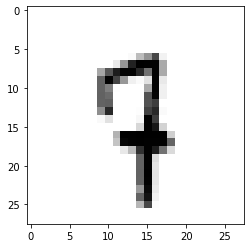

11943 Prediction:  [1]


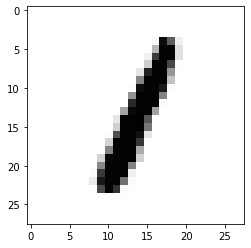

7207 Prediction:  [3]


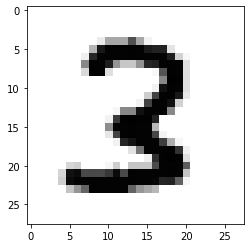

5342 Prediction:  [9]


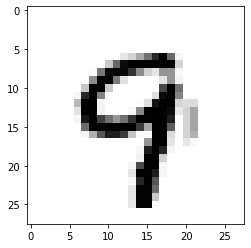

12342 Prediction:  [1]


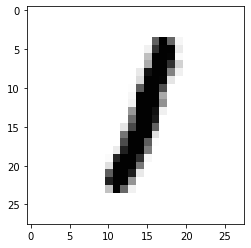

6395 Prediction:  [6]


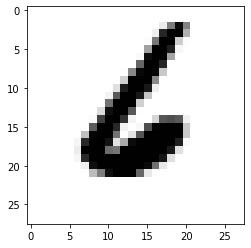

1518 Prediction:  [7]


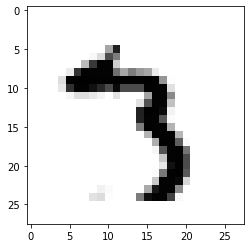

14767 Prediction:  [8]


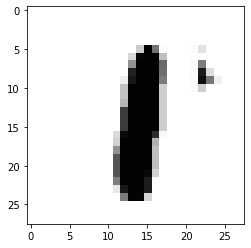

10243 Prediction:  [1]


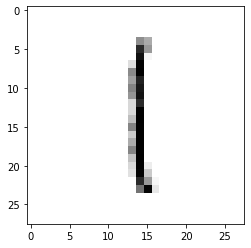

17536 Prediction:  [9]


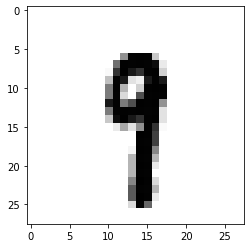

In [5]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
 
# Hypothesis (using softmax)
logits = tf.matmul(x,w)+b
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 1000
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    _, cost_val = sess.run([train, cost], feed_dict={x: x_data, y:y_data.reshape(len(y_data),1)})
    avg_cost += cost_val / (epoch+1)
    if epoch%100==0:
      print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()